In [ ]:
it uses sin(phase_activity)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity
import math

import cmath

import FCutils_Copy1 as util
import pickle

In [2]:
#healthy array!
# directed FOG network
# (LC,PRF,CNF,PPN,SNr,STN,GPi,GPe,Str,Ctx,SNc,Th)
d_h = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [0, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, -1],
        [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [0, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1],
        [0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0],
        [0, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, -1, 1, -1, -1, -1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])
# PD
d_pd= np.array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 0., -1., -1., -1.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.],
       [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 0., -1.,  0., -1., -1., -1.,  0., -1., -1.,  0., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0., -1., -1., -1.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.]])

#np.fill_diagonal(d_h, 0)
#np.fill_diagonal(d_pd, 0)

In [3]:
N=12
f=20
freq = np.ones(N) * f  # intrinsic frequencyruntime=1000
num_trials=1000
# coupling_factor=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
coupling_factor=[0, 0.2, 0.4, 0.6, 0.8, 1]

#dt_int=0.01
#finalTime=100
dt_int=0.1
finalTime=100
runtime=1000
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']
# subplot coordinations
m=3
n=2

In [4]:
def initial_angles(low,
                   high,
                   size,
                   num_trials):
    all_angles=[]
    for i in range(num_trials):
            all_angles.append(np.random.uniform(low, high, size))
    return all_angles 
    
initial_ang= initial_angles(-np.pi, 0.01+np.pi, N, num_trials)

In [5]:
all_angles=[]
for i in range(num_trials):
            all_angles.append(2* np.pi*np.random.random(N))
initial_ang= all_angles

In [6]:
# Functional connectivity
graph=d_h
FCmat_c_h= util.from_SC_to_FC(graph,
                  freq,
                  N,
                  runtime,
                  num_trials,
                  coupling_factor,
                  dt_int,
                  finalTime,
                  initial_ang,
                  Kuramoto)

In [7]:
# Functional connectivity
graph=d_pd

FCmat_c_pd= util.from_SC_to_FC(graph,
                  freq,
                  N,
                  runtime,
                  num_trials,
                  coupling_factor,
                  dt_int,
                  finalTime,
                  initial_ang,
                              Kuramoto)

In [8]:
FCmat_c_h[0].shape

(12, 12, 1000)

In [9]:
# save matrix
#with open("FCmat_c_h_2", "wb") as fp:   #Pickling
#    pickle.dump(FCmat_c_h, fp)
# recall all connectivity matrices
# with open("FCmat_c_h_2", "rb") as fp:   # Unpickling
#     FCmat_c_h = pickle.load(fp)

# save matrix
#with open("FCmat_c_pd_2", "wb") as fp:   #Pickling
#    pickle.dump(FCmat_c_pd, fp)
# recall all connectivity matrices
# with open("FCmat_c_pd_2", "rb") as fp:   # Unpickling
#     FCmat_c_pd = pickle.load(fp)
    

In [10]:
FCmat_c_pd[5].shape    # 0 t0 5 : we have 6 coupling factors

(12, 12, 1000)

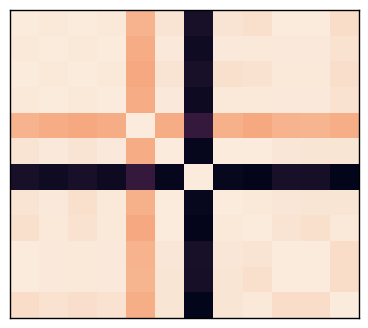

In [11]:
mat= FCmat_c_pd[5][:,:,0]
index= y_axis_labels

sns.set(rc={'figure.figsize':(4.5,4)})
ax=sns.heatmap(mat,
              cbar=None,
              xticklabels=False,
              yticklabels=False)
# Adding a black frame around the heatmap  
for spine in ax.spines.values():  
    spine.set_visible(True)   # Makes sure the spine is visible  
    spine.set_linewidth(1)    # You can adjust the linewidth as needed  
    spine.set_color('black')   # Set color to black  
#plt.savefig('results/meanFC_PD_0.png')

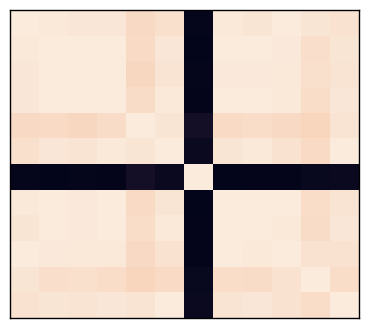

In [12]:
mat= FCmat_c_pd[5][:,:,100]
index= y_axis_labels

sns.set(rc={'figure.figsize':(4.5,4)})
ax=sns.heatmap(mat,
              cbar=None,
              xticklabels=False,
              yticklabels=False)
# Adding a black frame around the heatmap  
for spine in ax.spines.values():  
    spine.set_visible(True)   # Makes sure the spine is visible  
    spine.set_linewidth(1)    # You can adjust the linewidth as needed  
    spine.set_color('black')   # Set color to black  
#plt.savefig('results/meanFC_PD_100.png')

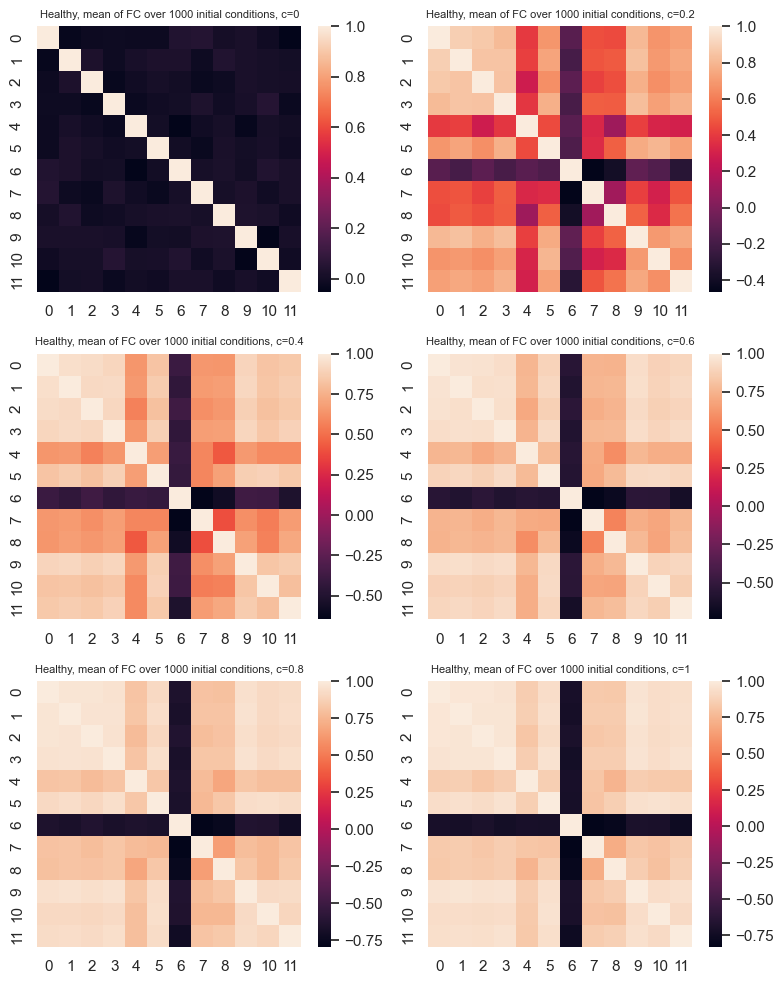

In [13]:
# mean
mFC_h= util.meanFC(coupling_factor, FCmat_c_h)
mFC_pd= util.meanFC(coupling_factor, FCmat_c_pd)

fig = plt.figure(figsize=(8,10))


for j in range(len(coupling_factor)):
    #plot FC matrix
    plt.subplot(m,n,int(j)+1)
    sns.heatmap(mFC_h[j])
    plt.title('Healthy, mean of FC over {} initial conditions, c={}'.format(num_trials,
                                                                               coupling_factor[j]),fontsize = 8)
    plt.tight_layout()
      

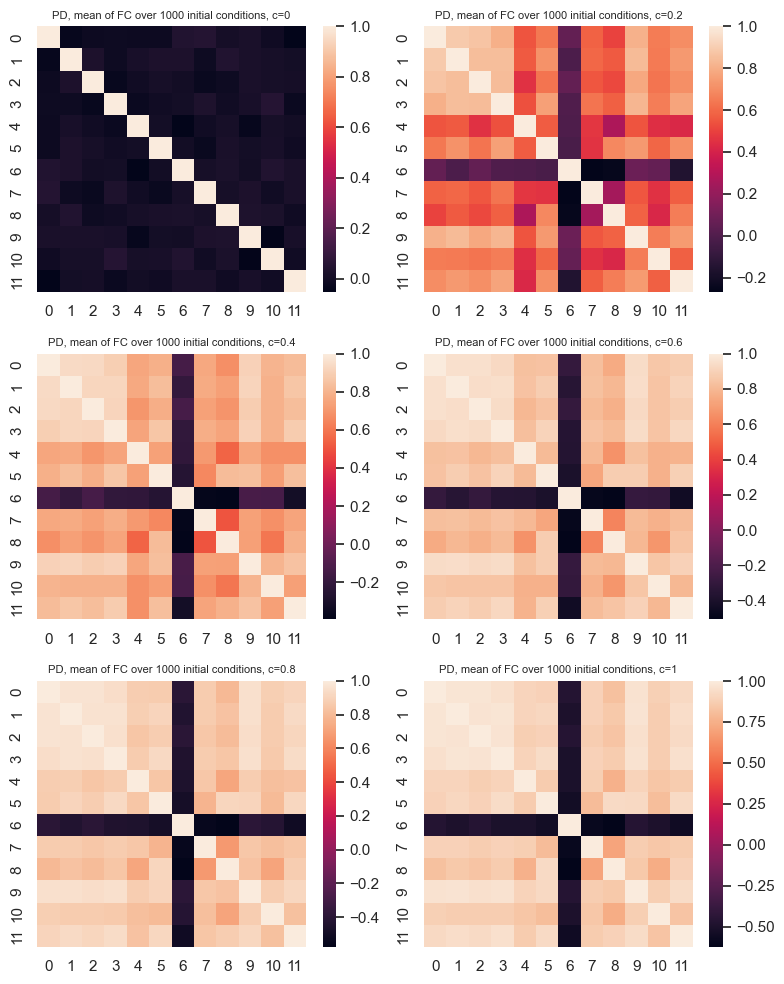

In [14]:
fig = plt.figure(figsize=(8,10))

for j in range(len(coupling_factor)):
    #plot FC matrix
    plt.subplot(m,n,int(j)+1)
    sns.heatmap(mFC_pd[j])
    plt.title('PD, mean of FC over {} initial conditions, c={}'.format(num_trials,
                                                                               coupling_factor[j]),fontsize = 8)
    plt.tight_layout()  

In [15]:
mFC_h[0].shape

(12, 12)

Text(0.5, 1.0, 'Mean Functional Connectivity over 1000 Trials in PD')

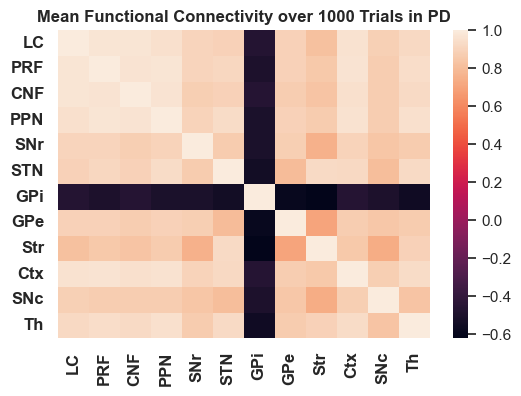

In [16]:
index= y_axis_labels

sns.set(rc={'figure.figsize':(6,4)})
ax=sns.heatmap(mFC_pd[5],
           xticklabels=index, yticklabels=index)
# Customize tick labels font size and weight  
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for x-ticks  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for y-ticks  
plt.title('Mean Functional Connectivity over 1000 Trials in PD', fontweight='bold',fontsize = 12)
#plt.savefig('results/meanFC_PD.png', dpi=300, bbox_inches='tight', transparent=True)
  

# Distance of Mean FC

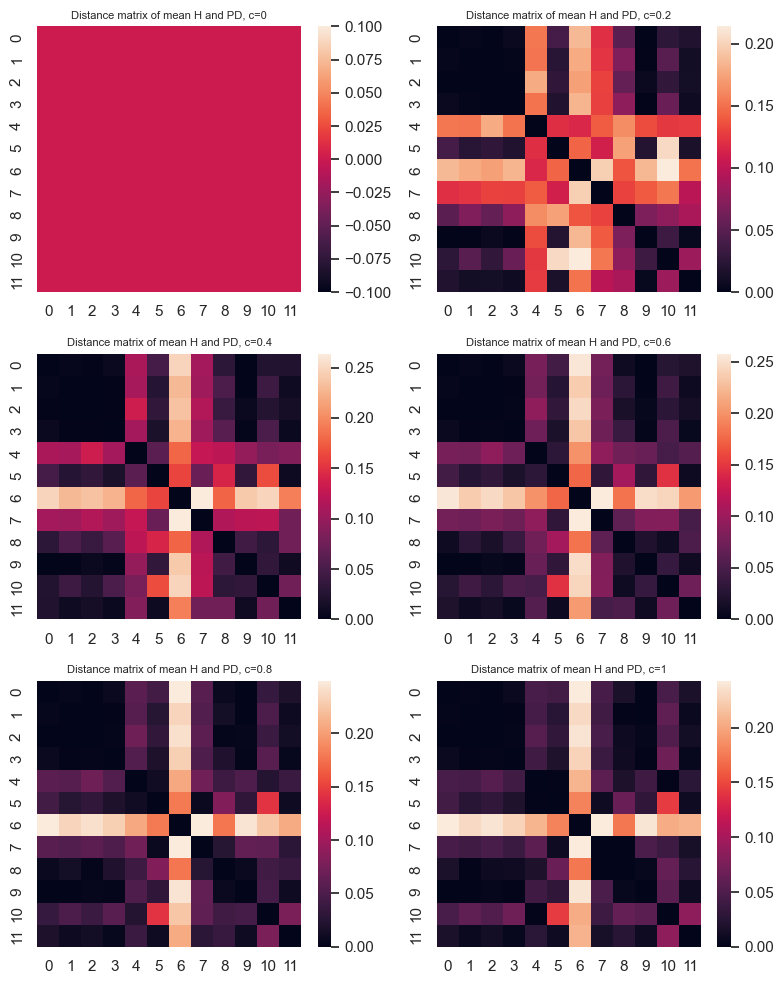

In [17]:
plt.subplots(m, n, figsize = (8,10))

for i in range(len(coupling_factor)):
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.abs(mFC_h[i]-mFC_pd[i]))
    plt.title('Distance matrix of mean H and PD, c={}'.format(coupling_factor[i]),fontsize = 8)
    plt.tight_layout()

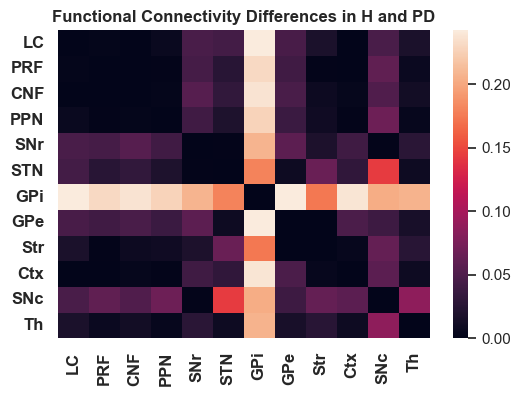

In [27]:
index= y_axis_labels

sns.set(rc={'figure.figsize':(6,4)})
ax=sns.heatmap(np.abs(mFC_h[5]-mFC_pd[5]),
           xticklabels=index, yticklabels=index)
# Customize tick labels font size and weight  
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for x-ticks  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for y-ticks  
plt.title('Functional Connectivity Differences in H and PD', fontweight='bold',fontsize = 12)
plt.savefig('results/Distance_meanFC.png', bbox_inches='tight', transparent=True)


# Variance of FC

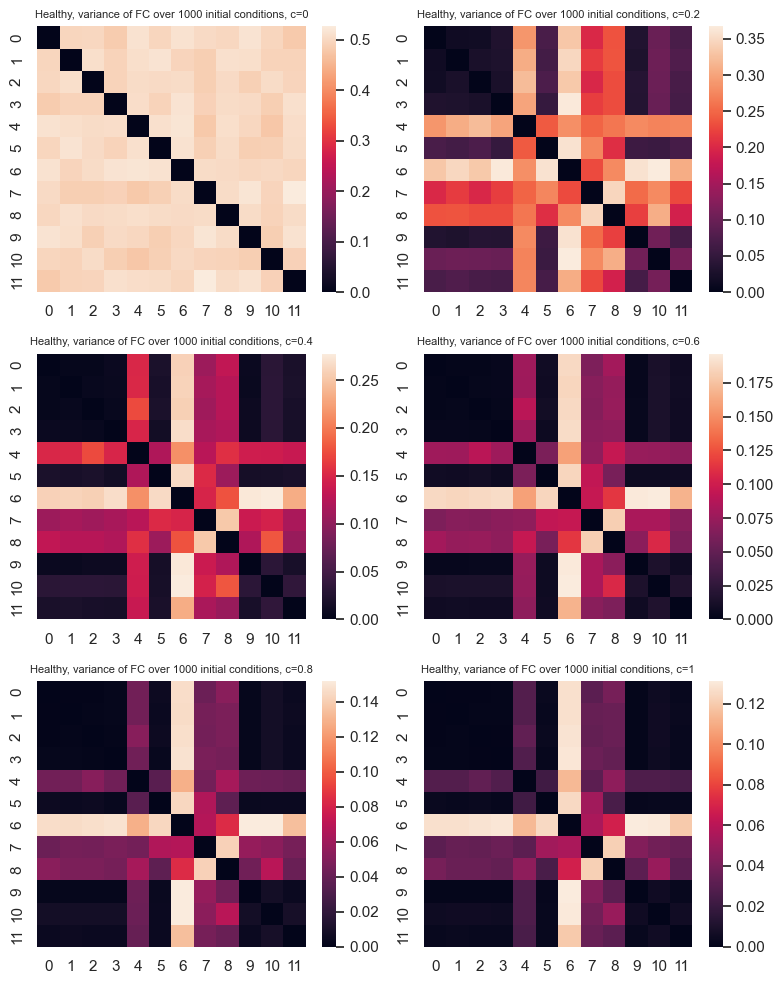

In [19]:
# variance
vFC_h= util.varFC(coupling_factor, FCmat_c_h)
vFC_pd= util.varFC(coupling_factor, FCmat_c_pd)


fig = plt.figure(figsize=(8,10))

for j in range(len(coupling_factor)):
    #plot FC matrix
    plt.subplot(m,n,int(j)+1)
    sns.heatmap(vFC_h[j])
    plt.title('Healthy, variance of FC over {} initial conditions, c={}'.format(num_trials,
                                                                               coupling_factor[j]),fontsize = 8)
    plt.tight_layout()

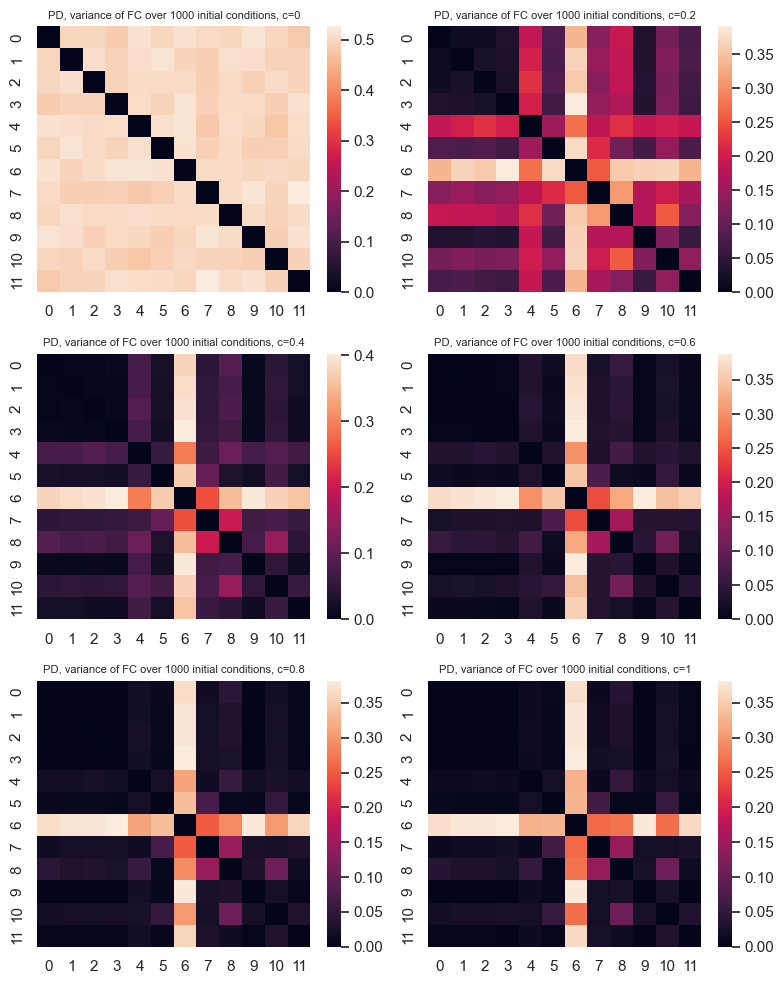

In [20]:

fig = plt.figure(figsize=(8,10))

for j in range(len(coupling_factor)):
    #plot FC matrix
    plt.subplot(m,n,int(j)+1)
    sns.heatmap(vFC_pd[j])
    plt.title('PD, variance of FC over {} initial conditions, c={}'.format(num_trials,
                                                                               coupling_factor[j]),fontsize = 8)
    plt.tight_layout()

# Distance of variance

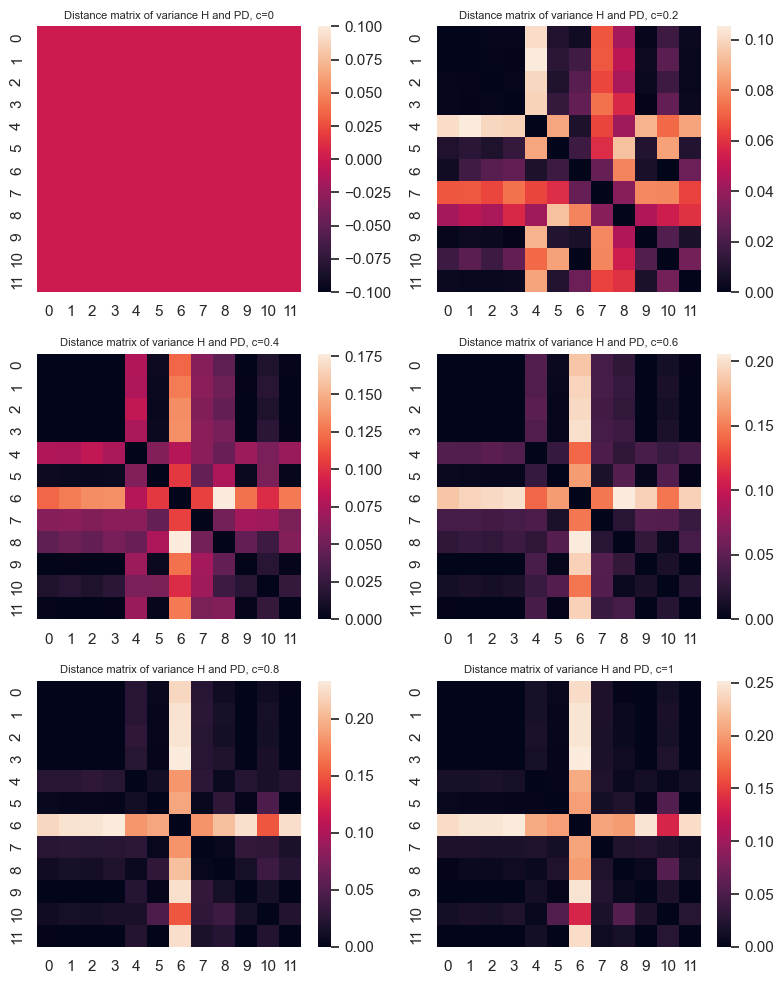

In [21]:
# variance

plt.subplots(m, n, figsize = (8,10))

for i in range(len(coupling_factor)):
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.abs(vFC_h[i]-vFC_pd[i]))
    plt.title('Distance matrix of variance H and PD, c={}'.format(coupling_factor[i]),fontsize =8)
    plt.tight_layout()

In [22]:
print(np.sum(np.square(vFC_h[0]-vFC_pd[0])))
print(np.sum(np.square(vFC_h[1]-vFC_pd[1])))
print(np.sum(np.square(vFC_h[2]-vFC_pd[2])))
print(np.sum(np.square(vFC_h[3]-vFC_pd[3])))
print(np.sum(np.square(vFC_h[4]-vFC_pd[4])))
print(np.sum(np.square(vFC_h[5]-vFC_pd[5])))


0.0
0.32649134309345046
0.5458105738092262
0.787021821898645
0.9889218384370513
1.1270876812501442


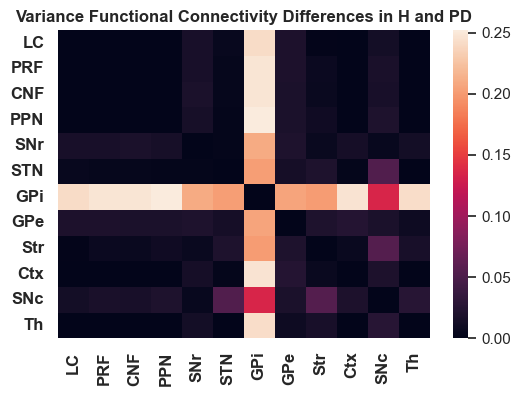

In [26]:
index= y_axis_labels

sns.set(rc={'figure.figsize':(6,4)})
ax=sns.heatmap(np.abs(vFC_h[5]-vFC_pd[5]),
           xticklabels=index, yticklabels=index)
# Customize tick labels font size and weight  
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for x-ticks  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for y-ticks  
plt.title('Variance Functional Connectivity Differences in H and PD', fontweight='bold',fontsize = 12)
plt.savefig('results/Distance_VarFC.png', bbox_inches='tight', transparent=True)
